In [70]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import adam
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv('/home/ubuntu/gangmin/lol/win_loss_variables.csv')
print(data)

      Unnamed: 0      gold     tower      kill  blue_result  red_result
0              0  0.000131  0.000169  0.000160            1           0
1              1  0.000120  0.000136  0.000104            0           1
2              2  0.000147  0.000271  0.000217            1           0
3              3  0.000122  0.000085  0.000104            0           1
4              4  0.000126  0.000152  0.000217            1           0
...          ...       ...       ...       ...          ...         ...
7615        7615  0.000120  0.000085  0.000076            0           1
7616        7616  0.000146  0.000102  0.000085            0           1
7617        7617  0.000072  0.000017  0.000057            0           1
7618        7618  0.000143  0.000169  0.000160            1           0
7619        7619  0.000161  0.000085  0.000123            0           1

[7620 rows x 6 columns]


In [72]:
data = data.loc[:,['gold','tower','kill','blue_result','red_result']]

In [73]:
data

,gold,tower,kill,blue_result,red_result
0,0.000131,0.000169,0.000160,1,0
1,0.000120,0.000136,0.000104,0,1
2,0.000147,0.000271,0.000217,1,0
3,0.000122,0.000085,0.000104,0,1
4,0.000126,0.000152,0.000217,1,0
...,...,...,...,...,...
7615,0.000120,0.000085,0.000076,0,1
7616,0.000146,0.000102,0.000085,0,1
7617,0.000072,0.000017,0.000057,0,1
7618,0.000143,0.000169,0.000160,1,0


In [74]:
X = data.loc[:,['gold','tower','kill']]
y = data.loc[:,['blue_result','red_result']]

In [75]:
#stratified shuffle spit

from sklearn.model_selection import StratifiedShuffleSplit
seed = 10
shufflesplit = StratifiedShuffleSplit(n_splits=100,random_state=seed,test_size=0.3)
print(shufflesplit)

for train_index ,test_index in shufflesplit.split(X,y):
    train_x = X.loc[train_index]
    test_x = X.loc[test_index]
    train_y = y.loc[train_index]
    test_y = y.loc[test_index]


StratifiedShuffleSplit(n_splits=100, random_state=10, test_size=0.3,
            train_size=None)


In [86]:
#build model
model = Sequential()
model.add(Dense(128, input_shape=(3,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [87]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
history = model.fit(train_x,train_y,epochs=200,batch_size=50,verbose=1,validation_data=[test_x,test_y])

Train on 5334 samples, validate on 2286 samples
Epoch 1/200
5334/5334 [==============================] - 1s 94us/step - loss: 0.6902 - accuracy: 0.5429 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 2/200
5334/5334 [==============================] - 0s 44us/step - loss: 0.6899 - accuracy: 0.5441 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 3/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.6897 - accuracy: 0.5441 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 4/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.6899 - accuracy: 0.5441 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 5/200
5334/5334 [==============================] - 0s 45us/step - loss: 0.6894 - accuracy: 0.5441 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 6/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.6898 - accuracy: 0.5441 - val_loss: 0.6892 - val_accuracy: 0.5442
Epoch 7/200
5334/5334 [==============================] - 0s 44us/step - loss

5334/5334 [==============================] - 0s 42us/step - loss: 0.6886 - accuracy: 0.5441 - val_loss: 0.6879 - val_accuracy: 0.5442
Epoch 57/200
5334/5334 [==============================] - 0s 44us/step - loss: 0.6882 - accuracy: 0.5441 - val_loss: 0.6880 - val_accuracy: 0.5442
Epoch 58/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.6883 - accuracy: 0.5441 - val_loss: 0.6874 - val_accuracy: 0.5442
Epoch 59/200
5334/5334 [==============================] - 0s 44us/step - loss: 0.6876 - accuracy: 0.5441 - val_loss: 0.6872 - val_accuracy: 0.5442
Epoch 60/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.6876 - accuracy: 0.5441 - val_loss: 0.6868 - val_accuracy: 0.5442
Epoch 61/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.6865 - accuracy: 0.5441 - val_loss: 0.6864 - val_accuracy: 0.5442
Epoch 62/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.6872 - accuracy: 0.5441 - val_loss: 0.6862 - val_a

Epoch 112/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.4377 - accuracy: 0.8431 - val_loss: 0.3339 - val_accuracy: 0.9256
Epoch 113/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.4513 - accuracy: 0.8283 - val_loss: 0.4098 - val_accuracy: 0.8281
Epoch 114/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.4479 - accuracy: 0.8305 - val_loss: 0.3462 - val_accuracy: 0.9278
Epoch 115/200
5334/5334 [==============================] - 0s 41us/step - loss: 0.4566 - accuracy: 0.8260 - val_loss: 0.3733 - val_accuracy: 0.9125
Epoch 116/200
5334/5334 [==============================] - 0s 44us/step - loss: 0.4467 - accuracy: 0.8320 - val_loss: 0.3252 - val_accuracy: 0.9296
Epoch 117/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.4436 - accuracy: 0.8358 - val_loss: 0.3185 - val_accuracy: 0.9256
Epoch 118/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.4402 - accuracy: 0.8412 - val_

5334/5334 [==============================] - 0s 42us/step - loss: 0.4166 - accuracy: 0.8442 - val_loss: 0.2794 - val_accuracy: 0.9361
Epoch 168/200
5334/5334 [==============================] - 0s 41us/step - loss: 0.4044 - accuracy: 0.8530 - val_loss: 0.2608 - val_accuracy: 0.9361
Epoch 169/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.4000 - accuracy: 0.8562 - val_loss: 0.2815 - val_accuracy: 0.9304
Epoch 170/200
5334/5334 [==============================] - 0s 41us/step - loss: 0.4095 - accuracy: 0.8481 - val_loss: 0.2870 - val_accuracy: 0.9186
Epoch 171/200
5334/5334 [==============================] - 0s 43us/step - loss: 0.3922 - accuracy: 0.8568 - val_loss: 0.2575 - val_accuracy: 0.9304
Epoch 172/200
5334/5334 [==============================] - 0s 41us/step - loss: 0.4206 - accuracy: 0.8395 - val_loss: 0.2835 - val_accuracy: 0.9366
Epoch 173/200
5334/5334 [==============================] - 0s 42us/step - loss: 0.3950 - accuracy: 0.8570 - val_loss: 0.2687 -

In [93]:
history_dict = history.history
import matplotlib.pyplot as plt

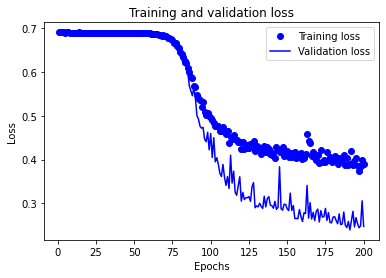

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


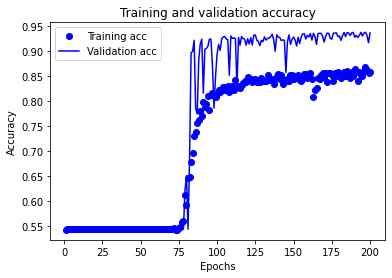

In [95]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [96]:
y_predict = model.predict(test_x)

In [97]:
y_predict

array([[0.8995836 , 0.05531827],
       [0.7154265 , 0.09784025],
       [0.9067234 , 0.05328473],
       ...,
       [0.08304107, 0.34834492],
       [0.0830411 , 0.34834492],
       [0.09181438, 0.3364445 ]], dtype=float32)

In [98]:
model.save('/home/ubuntu/gangmin/lol/win_loss_classifier.h5')